In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, VarianceThreshold
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SequentialFeatureSelector

### Data Collection

In [ ]:
import requests

# URLs of the files
data_url = 'https://www.raphaelcousin.com/modules/module5/course/module5_course_feature_selection_and_dimensionality_reduction.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data, 'module5_course_feature_selection_and_dimensionality_reduction.csv')

In [2]:
df = pd.read_csv('module5_course_feature_selection_and_dimensionality_reduction.csv')

## Data Analysis

## Data Preparation - Feature Selection And Dimensionality Reduction

In [3]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Selection

Features to drop based on high correlation: mean perimeter, mean area, perimeter error, area error, worst radius, worst perimeter, worst area


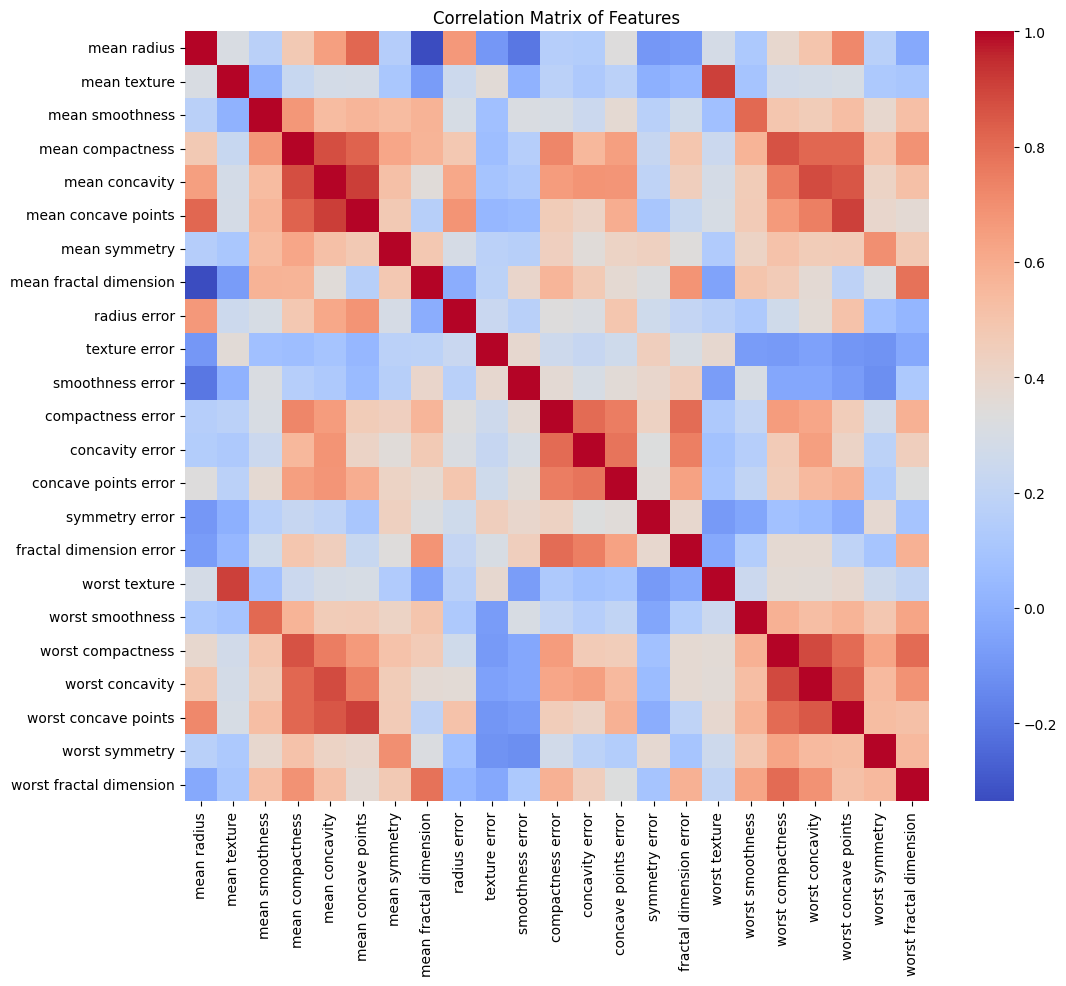

In [4]:
# 1. Correlation Analysis
def correlation_analysis(X, threshold=0.95):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Features to drop based on high correlation: {', '.join(to_drop)}")
    return X.drop(to_drop, axis=1)

X_uncorrelated = correlation_analysis(X_train)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_uncorrelated.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [5]:
# 2. Variance Threshold
def variance_threshold_selection(X, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support()]

low_variance_features = variance_threshold_selection(X_train)
print(f"Features selected based on variance threshold: {', '.join(low_variance_features)}")

Features selected based on variance threshold: mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension


In [6]:
# 3. Univariate Feature Selection
def univariate_feature_selection(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

univariate_features = univariate_feature_selection(X_train, y_train)
print(f"Top features based on univariate selection: {', '.join(univariate_features)}")

Top features based on univariate selection: mean radius, mean perimeter, mean area, mean concavity, mean concave points, worst radius, worst perimeter, worst area, worst concavity, worst concave points


In [7]:
# 4. Mutual Information
def mutual_info_feature_selection(X, y, k=10):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

mi_features = mutual_info_feature_selection(X_train, y_train)
print(f"Top features based on mutual information: {', '.join(mi_features)}")

Top features based on mutual information: mean radius, mean perimeter, mean area, mean concavity, mean concave points, worst radius, worst perimeter, worst area, worst concavity, worst concave points


In [8]:
# 5. Recursive Feature Elimination (RFE)
def rfe_feature_selection(X, y, n_features_to_select=10):
    estimator = LogisticRegression(max_iter=5000)
    selector = RFE(estimator, n_features_to_select=n_features_to_select)
    selector = selector.fit(X, y)
    return X.columns[selector.support_]

rfe_features = rfe_feature_selection(X_train, y_train)
print(f"Features selected by RFE: {', '.join(rfe_features)}")

Features selected by RFE: mean concave points, radius error, area error, compactness error, worst radius, worst texture, worst perimeter, worst area, worst concavity, worst concave points


In [9]:
# 6. Lasso (L1 Regularization)
def lasso_feature_selection(X, y, alpha=0.01):
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X, y)
    return X.columns[lasso.coef_ != 0]

lasso_features = lasso_feature_selection(X_train, y_train)
print(f"Features selected by Lasso: {', '.join(lasso_features)}")

Features selected by Lasso: mean texture, mean concave points, mean fractal dimension, radius error, smoothness error, compactness error, concavity error, worst radius, worst texture, worst smoothness, worst concavity, worst concave points, worst symmetry


Top 10 features based on Random Forest importance:
                 feature  importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
22       worst perimeter    0.067115
2         mean perimeter    0.053270
0            mean radius    0.048703
3              mean area    0.047555
26       worst concavity    0.031802


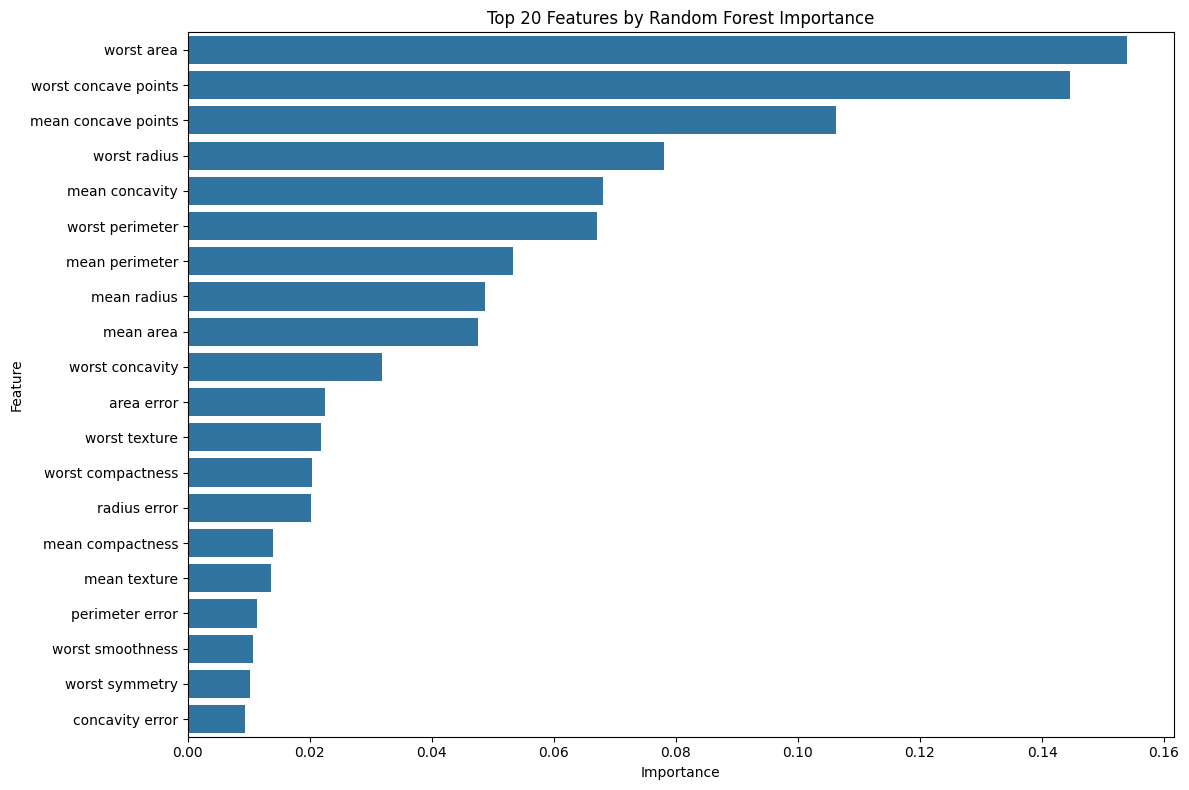

In [10]:
# 7. Random Forest Feature Importance
def rf_feature_importance(X, y):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    return importance.sort_values('importance', ascending=False)

rf_importance = rf_feature_importance(X_train, y_train)
print("Top 10 features based on Random Forest importance:")
print(rf_importance.head(10))

# Visualize Random Forest feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_importance.head(20))
plt.title('Top 20 Features by Random Forest Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [11]:
# 8. Forward Feature Selection
def forward_feature_selection(X, y, n_features_to_select=10):
    sfs = SequentialFeatureSelector(
        estimator=LogisticRegression(max_iter=5000),
        n_features_to_select=n_features_to_select,
        direction='forward',
        scoring='accuracy',
        cv=5
    )
    sfs.fit(X, y)
    return list(X.columns[sfs.get_support()])

forward_features = forward_feature_selection(X_train, y_train)
print(f"Features selected by Forward Selection: {', '.join(forward_features)}")

Features selected by Forward Selection: mean radius, mean texture, mean perimeter, texture error, compactness error, symmetry error, worst radius, worst texture, worst smoothness, worst concavity


In [12]:
# 9. Backward Feature Elimination
def backward_feature_elimination(X, y, n_features_to_select=10):
    sfs = SequentialFeatureSelector(
        estimator=LogisticRegression(max_iter=5000),
        n_features_to_select=n_features_to_select,
        direction='backward',
        scoring='accuracy',
        cv=5
    )
    sfs.fit(X, y)
    return list(X.columns[sfs.get_support()])

backward_features = backward_feature_elimination(X_train, y_train)
print(f"Features selected by Backward Elimination: {', '.join(backward_features)}")

Features selected by Backward Elimination: mean concave points, perimeter error, compactness error, worst radius, worst texture, worst area, worst concavity, worst concave points, worst symmetry, worst fractal dimension


### Dimensionality Reduction Techniques

In [13]:
# 11. Principal Component Analysis (PCA)
def pca_reduction(X_train, X_test=None, n_components=0.95):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    print(f"Number of PCA components explaining {n_components*100}% variance: {pca.n_components_}")
    if X_test is not None:
        X_test_pca = pca.transform(X_test)
        return X_train_pca, X_test_pca
    return X_train_pca

X_pca = pca_reduction(X_train)

Number of PCA components explaining 95.0% variance: 10


In [14]:

# 12. t-SNE
def tsne_reduction(X, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    X_tsne = tsne.fit_transform(X)
    return X_tsne

X_tsne = tsne_reduction(X_train)

In [15]:
# 13. Linear Discriminant Analysis (LDA)
def lda_reduction(X, y, n_components=None):
    # Determine the number of classes
    n_classes = len(np.unique(y))
    
    # Calculate the maximum possible number of components
    max_components = min(X.shape[1], n_classes - 1)
    
    # If n_components is not specified or is too large, set it to the maximum
    if n_components is None or n_components > max_components:
        n_components = max_components
    
    lda = LDA(n_components=n_components)
    X_lda = lda.fit_transform(X, y)
    return X_lda

X_lda = lda_reduction(X_train, y_train)

All Features (number of features 30)- Accuracy: 0.9737
Uncorrelated (number of features 23)- Accuracy: 0.9649
Univariate (number of features 10)- Accuracy: 0.9737
Mutual Information (number of features 10)- Accuracy: 0.9737
RFE (number of features 10)- Accuracy: 0.9737
Lasso (number of features 13)- Accuracy: 0.9737
Random Forest (number of features 10)- Accuracy: 0.9737
Forward Selection (number of features 10)- Accuracy: 0.9737
Backward Elimination (number of features 10)- Accuracy: 0.9737
Number of PCA components explaining 95.0% variance: 10
PCA (number of features 10)- Accuracy: 0.9825
t-SNE (number of features 2)- Accuracy: 0.6053
LDA (number of features 1)- Accuracy: 0.9912


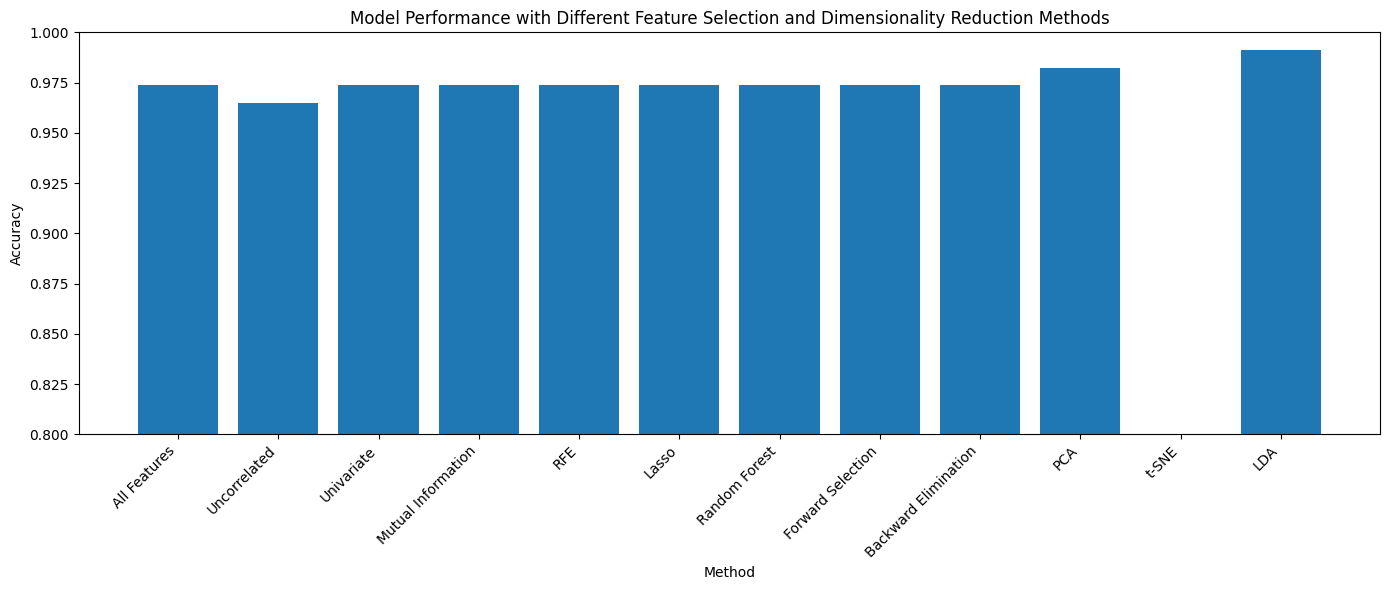

In [17]:
# Evaluate different feature sets and dimensionality reduction techniques
def evaluate_feature_set(X_train, X_test, y_train, y_test, features=None):
    if features is not None and len(features) > 0:
        X_train_selected = X_train[features]
        X_test_selected = X_test[features]
    else:
        X_train_selected = X_train
        X_test_selected = X_test
    
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

feature_sets = {
    'All Features': X_train.columns,
    'Uncorrelated': X_uncorrelated.columns,
    'Univariate': univariate_features,
    'Mutual Information': mi_features,
    'RFE': rfe_features,
    'Lasso': lasso_features,
    'Random Forest': rf_importance['feature'][:10],
    'Forward Selection': forward_features,
    'Backward Elimination': backward_features,
    'PCA': X_pca[0],
    't-SNE': X_tsne[0],
    'LDA': X_lda[0]
}

# In the evaluation loop:
results = {}
for name, features in feature_sets.items():
    try:
        if name in ['PCA', 't-SNE', 'LDA']:
            if name == 'PCA':
                X_train_reduced, X_test_reduced = pca_reduction(X_train, X_test)
            elif name == 't-SNE':
                X_train_reduced = tsne_reduction(X_train)
                X_test_reduced = tsne_reduction(X_test)
            else:  # LDA
                X_train_reduced = lda_reduction(X_train, y_train)
                X_test_reduced = lda_reduction(X_test, y_test)
            score = evaluate_feature_set(X_train_reduced, X_test_reduced, y_train, y_test)
        else:
            score = evaluate_feature_set(X_train, X_test, y_train, y_test, features)
        results[name] = score
        print(f"{name} (number of features {len(features)})- Accuracy: {score:.4f}")
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")
        results[name] = None

# Modify the visualization to handle None values
valid_results = {k: v for k, v in results.items() if v is not None}
plt.figure(figsize=(14, 6))
plt.bar(valid_results.keys(), valid_results.values())
plt.title('Model Performance with Different Feature Selection and Dimensionality Reduction Methods')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()